# Goodreads: Exploratory Data Analysis
#### by Daniel Walker, 26th of Septemeber 2019

## Contents  
  
1. [Introduction](#intro)
  
2. [Describing the data](#describing)  
  
3. [Supporting Functions](#supportfuncs)  
      
4. [Exploratory Data Analysis](#dataexplore)  
    1. [Who are the top 10 authors by books published?](#1)  
    2. [What are the 5 most common language of books?](#2)  
    3. [Who are the top 5 authors by number of ratings?](#3)   
    4. [Who are the top 5 authors by average rating? (No Num of Ratings Limit)](#4)    
    5. [Who are the top 5 authors by average rating? (Num of Ratings > 100)](#5)    
    6. [Who are the top 5 authors by average rating? (Num of Ratings > 1000)](#6)   
    7. [Who are the top 5 authors by average number of page per book?](#7)  
    8. [What are the top 10 books by average rating? (No limit)](#8)  
    9. [What are the top 10 books by average rating? (Num of Ratings > 100)](#9)    
    10. [What are the top 10 books by average rating? (Num of Ratings > 1000)](#10)      
    11. [Which books are top 5 based on their number of ratings?](#11)  
    12. [What is the average ratings of all books in the dataset?](#12)  
    13. [Is there a relationship between average rating and number of ratings for books?](#13)    
    14. [Is there a relationship between the number of books published and the average rating of all those books per author?](#14)  
    15. [What is the relationship between the number of pages of a book and its number of rating?](#15)  
  
5. [Learning Takeaways](#takeaways)   
 

<a id="intro"></a>
## Introduction
  
Goodreads: Exploratory Data Analysis is a project I have been working through with two main aims; firstly to find interesting things from the data, and secondly to learn and play with seaborn and its associated libraries.
  
The data set was sourced on the the 16th of September 2019 at 13:23gmt from [Kaggle](https://www.kaggle.com/jealousleopard/goodreadsbooks). The dataset was chosen as it was promised to be clean, (so I could focus more on the visulisation rather than data cleaning/engineering), and also that I like to read which makes it an interesting subject.

A lot of my work in this notebook was learnt through study of another notebook on the Kaggle website, also based on this dataset. [Link here](https://www.kaggle.com/hoshi7/goodreads-analysis-and-recommending-books).
  
Most of my comments through the notebook will be more design/process based rather than outcome based, as this is a learning project rather than an outcome project.

<a id='#describing'></a>
# 2. Describing the data

### Loading libraries and filtering warnings

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [95]:
df = pd.read_csv("./data/books.csv", error_bad_lines=False)
df.set_index(['bookID'], inplace=True)
df.tail(3)

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
47701,InterWorld (InterWorld #1),Neil Gaiman-Michael Reaves,3.53,61238961,9.780000e+12,en-US,239,14334,1485
47708,The Faeries' Oracle,Brian Froud-Jessica Macbeth,4.43,743201116,9.780000e+12,eng,224,1550,38
47709,The World of The Dark Crystal,Brian Froud,4.29,1862056242,9.780000e+12,eng,132,3572,33


In [96]:
df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

Very shortly after importing the data (books.csv), I noticed there were a few errors. These were fixed though various methods; opening the csv in excel, changing datatypes with pandas, and using pythons built in methods like .strip() and string formatting. I also ended up going back to my pandas import and dropping any rows with errors.
  
Some errors that still caused problems include:

- isbn13 numbers being displayed with scientific notation, therefore not usable as numbers. (Though in the end I didnt use them). 
- Author's names having extra spaces and tabs in the strings.- Some of the rows had data pushed one column to the right, making some rows have 11 columns of data rather than the expected 10.

<a id='#supportfuncs'></a>
# 3. Supporting Functions

**This section was initially much larger but has now been trimmed back to just one supporting fucntion. The other function were used for data cleaning / formatting and were used once to edit the dataset rather than on every run of this notebook.**

In [97]:
def minimalhbargraph():
    """Disables axis ticks and labels, outer axis 'box', sets seaborn context.
       Makes the graph very minimalist.
    """
    sns.set_context('poster')
    ax.set_ylabel('')
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([])
    plt.tight_layout()
    ax.axis('off')

<a id='#dataexplore'></a>
# 4. Exploratory Data Analysis

<a id='#1'></a>
## 4A. Who are the top 10 authors by books published? 

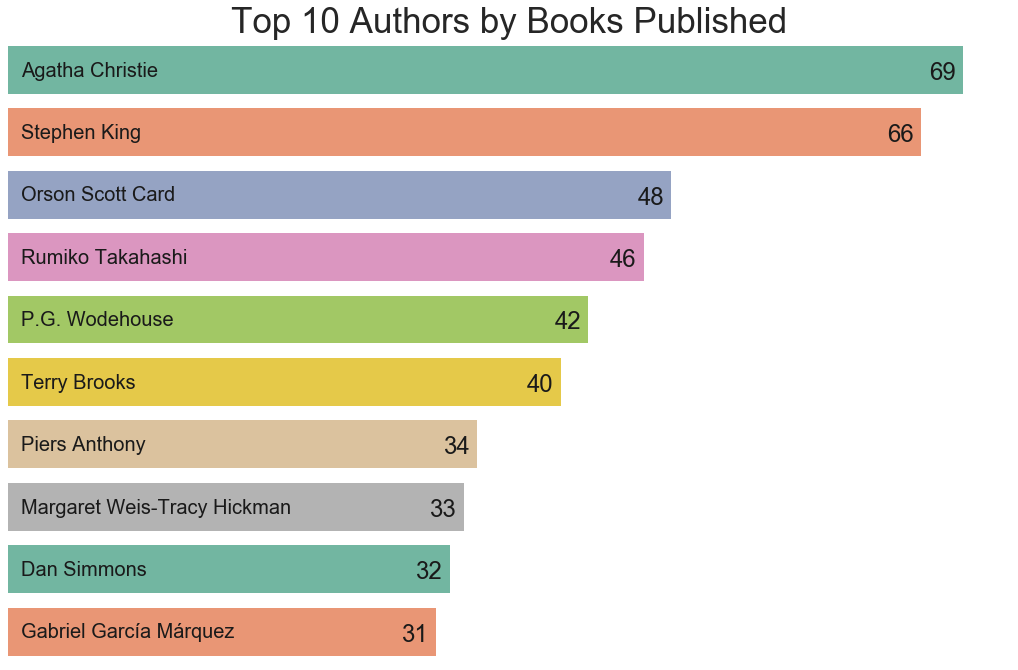

In [98]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='Set2')
ax.set_title("Top 10 Authors by Books Published", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-2.5, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(1 , i.get_y()+0.5, str(most_books.index[num]), fontsize = 20, color = 'k')
    num += 1


**I decided to try to make a minimalist, therefore easy to read, graph to display my data. Removing axis and labels and placing them on the bars themselves. This is why I chose horizonatal bar graphs as they give the space to display the information clearest.**

<a id='#2'></a>
## 4B. What are the 5 most common language of books? 

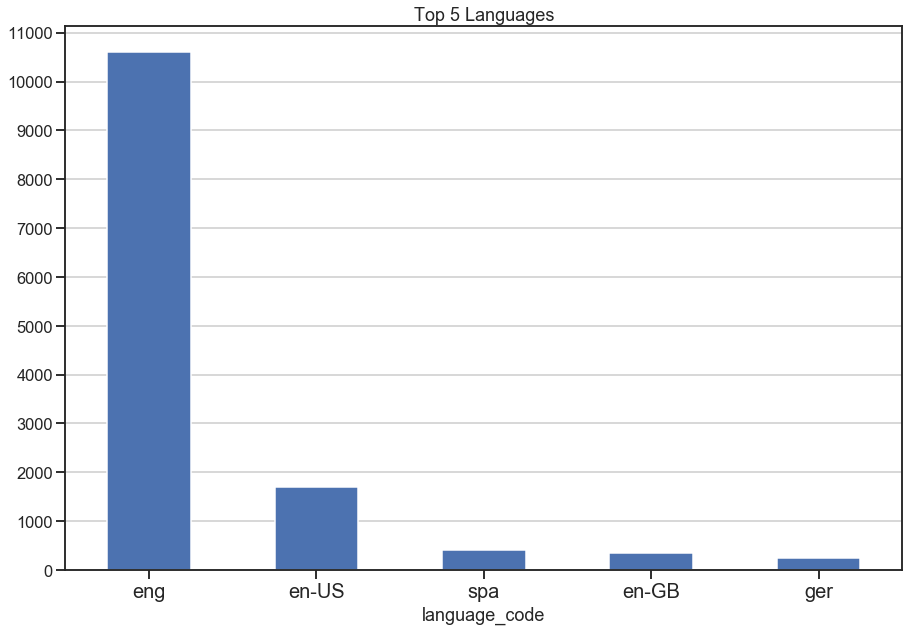

In [99]:
sns.set_context('talk')
plt.figure(figsize=(15,10))
ax =  df.groupby('language_code')['title'].count().sort_values(ascending=False).head(5).plot.bar()
plt.title('Top 5 Languages')
plt.xticks(fontsize = 20, rotation='horizontal')
plt.yticks([i*1000 for i in range(0, 12)])
plt.grid(axis='y')

**Yet another issue with the dataset displays itself here. There are apparently 3 catagories for the English language.   
A fix would be to just replace any instance of "en-US" or "en-GB" in the df['language_code'] column with just "eng".**

<a id='#3'></a>
## 4C. Who are the top 5 authors by number of ratings? 

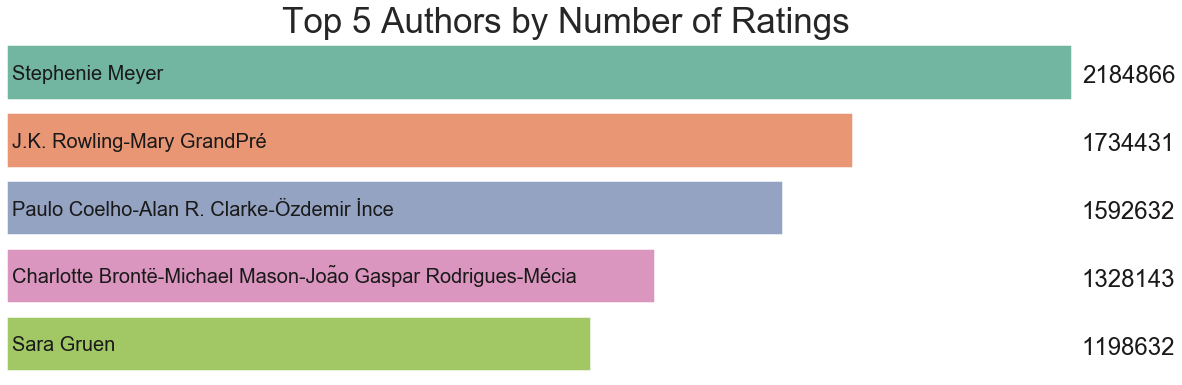

In [100]:
rating_author = df.groupby('authors').mean()
top_5_num_ratings = rating_author.sort_values('ratings_count', ascending=False).head(5)

plt.figure(figsize=(16.5, 6))
ax = sns.barplot(top_5_num_ratings['ratings_count'], top_5_num_ratings.index, palette='Set2')
ax.set_title("Top 5 Authors by Number of Ratings", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(2204866, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(10000 , i.get_y()+0.5, str(top_5_num_ratings.index[num]), fontsize = 20, color = 'k')
    num += 1


**Through this notebook I have ended up making small changes to the layout of some of the graphs, due to space being limited to display everything clearly or sometimes to just try differnt takes on the graphs themselves. (Sometimes graphing the information in any readable way is impossible).**

<a id='#4'></a>
## 4D. Who are the top 5 authors by average rating? (No Num of Ratings Limit)

**The number of rating plays a huge part in the top 5 authors in these lists. In an effort to show the effects of these outliers, I made 3 graphs changing the required number of ratings.**

In [101]:
rating_author = df.groupby('authors').mean()
top_5_rating_author = rating_author.sort_values('average_rating', ascending=False).head(5)

rating_author = rating_author.loc[rating_author['ratings_count'] > 100]
top_5_rating_author_over100 = rating_author.sort_values('average_rating', ascending=False).head(5)

rating_author = rating_author.loc[rating_author['ratings_count'] > 1000]
top_5_rating_author_over1000 = rating_author.sort_values('average_rating', ascending=False).head(5)

**Setting up some dataframes for the graphing below.**

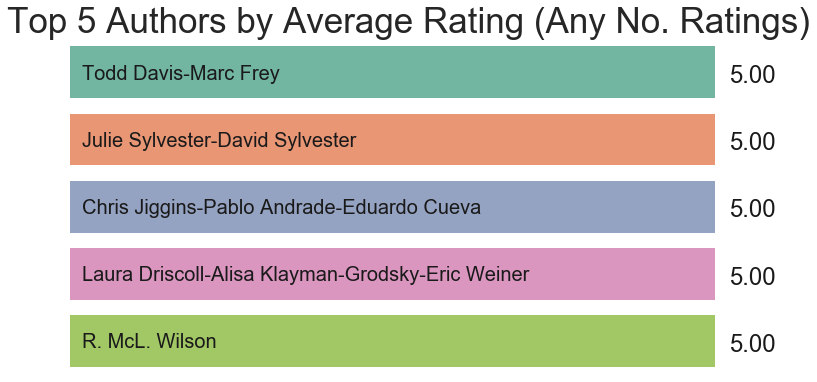

In [102]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author['average_rating'], top_5_rating_author.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Any No. Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author.index[num]), fontsize = 20, color = 'k')
    num += 1


<a id='#5'></a>
## 4E. Who are the top 5 authors by average rating? (Num of Ratings > 100)

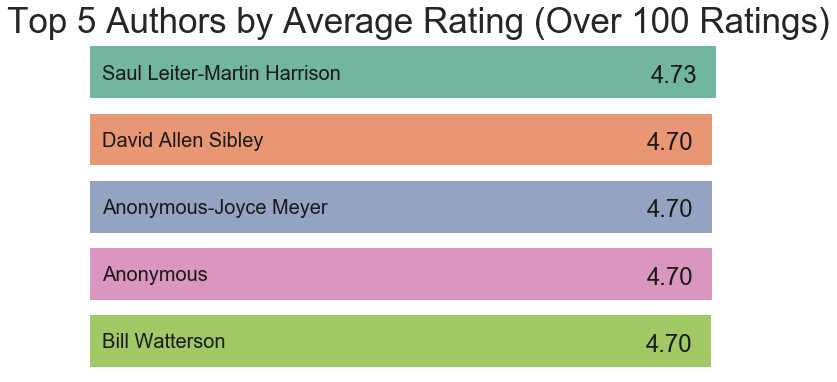

In [103]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author_over100['average_rating'], top_5_rating_author_over100.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Over 100 Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.5, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author_over100.index[num]), fontsize = 20, color = 'k')
    num += 1

    


<a id='#6'></a>
## 4F. Who are the top 5 authors by average rating? (Num of Ratings > 1000) 

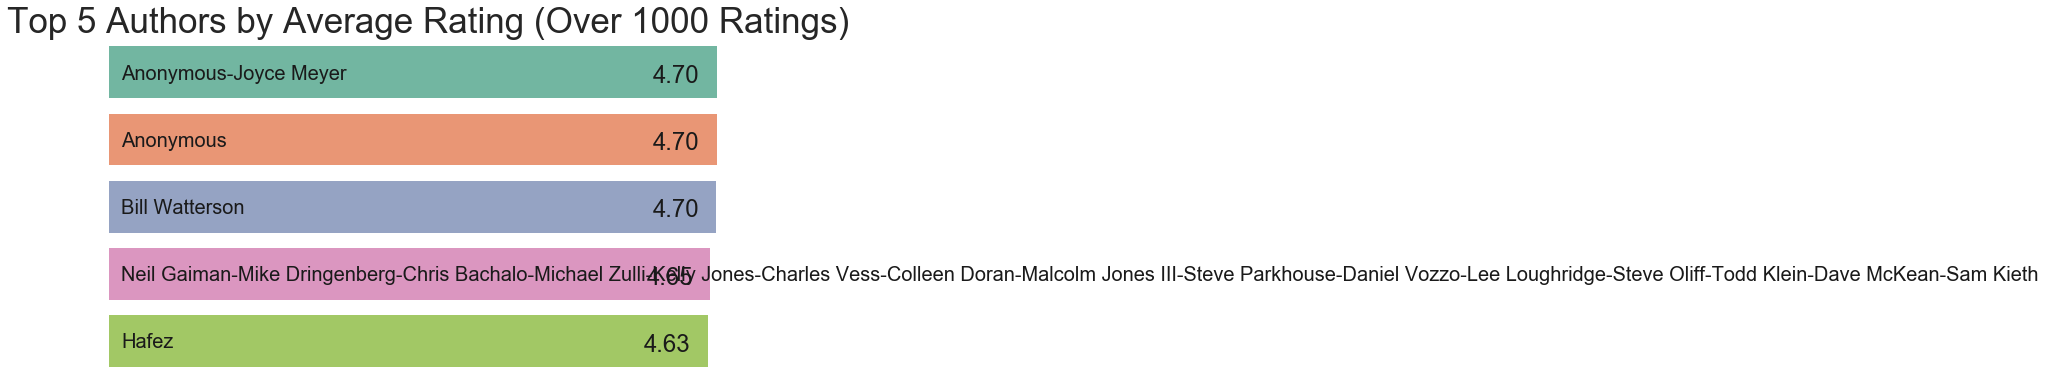

In [104]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author_over1000['average_rating'], top_5_rating_author_over1000.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Over 1000 Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.5, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author_over1000.index[num]), fontsize = 20, color = 'k')
    num += 1

**Another "issue" with the dataset, or visulisation of it, is that some of the book are collections of other books or short stories by many authors. As you can see in the case above.**

In [105]:
# This is the string of authors that RUINS my graph
top_5_rating_author_over1000.index[3]

'Neil Gaiman-Mike Dringenberg-Chris Bachalo-Michael Zulli-Kelly Jones-Charles Vess-Colleen Doran-Malcolm Jones III-Steve Parkhouse-Daniel Vozzo-Lee Loughridge-Steve Oliff-Todd Klein-Dave McKean-Sam Kieth'

<a id='#7'></a>
## 4G. Who are the top 5 authors by average number of page per book?

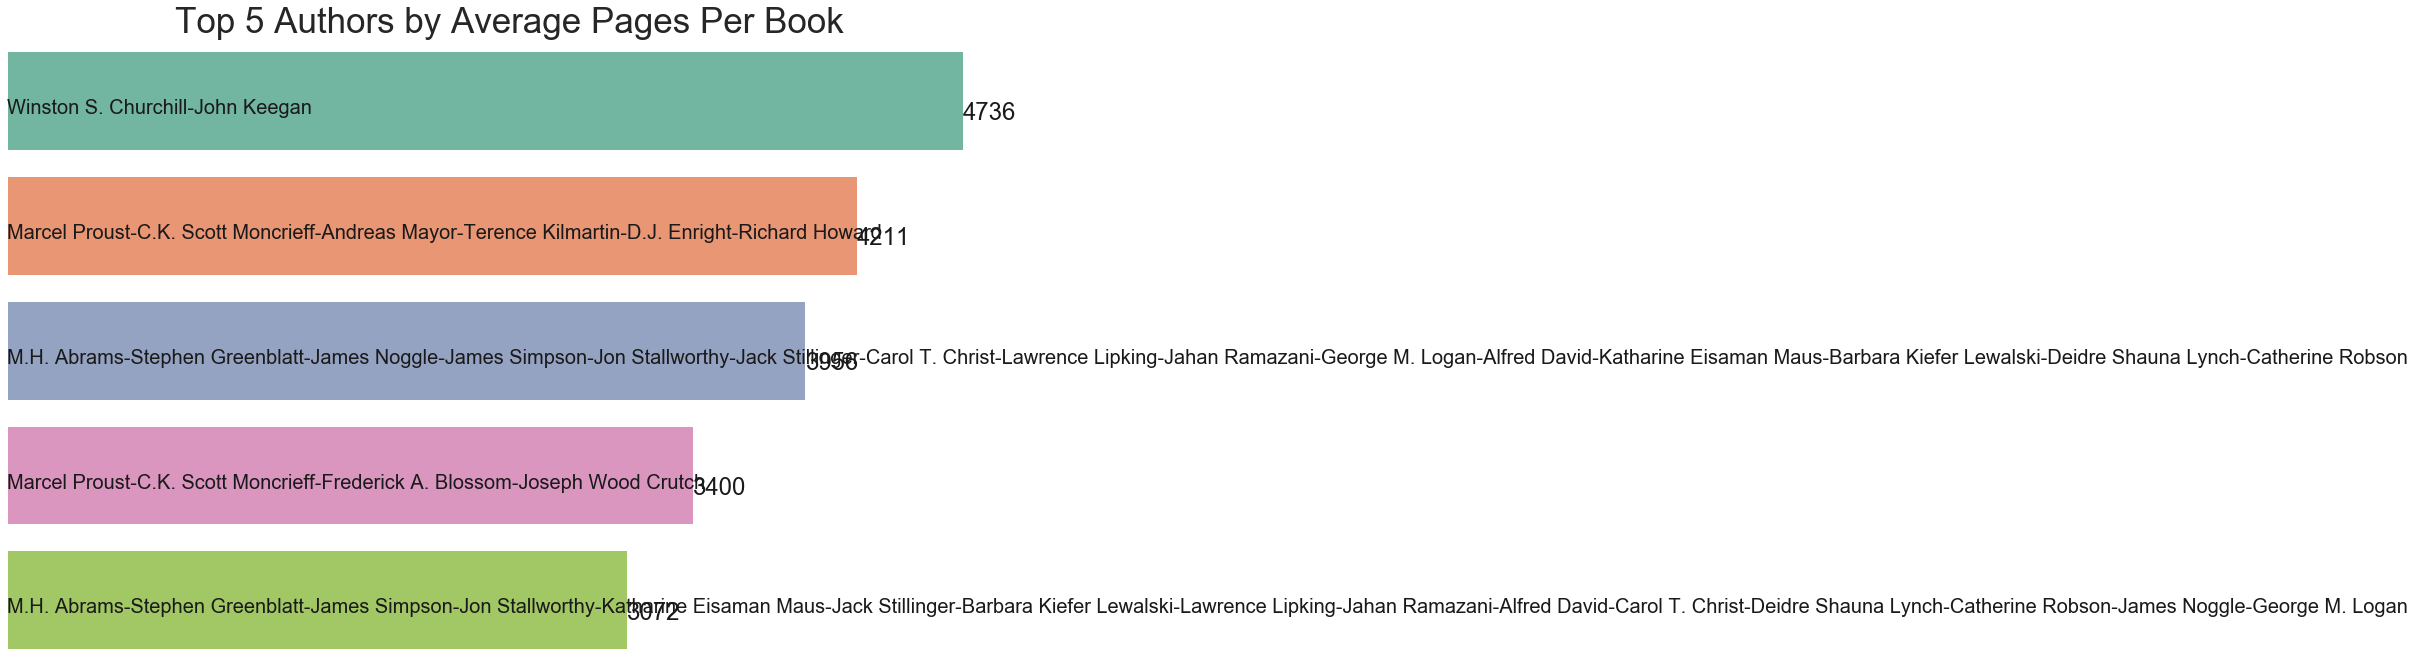

In [106]:
#Attempted graphing of the top 5 authors by avg number of page per book.

author_by_avg_pages = df.groupby('authors')['# num_pages'].mean().reset_index().sort_values('# num_pages', ascending=False).head(5).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(author_by_avg_pages['# num_pages'], author_by_avg_pages.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Pages Per Book", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-2.5, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(1 , i.get_y()+0.5, str(author_by_avg_pages.index[num]), fontsize = 20, color = 'k')
    num += 1


In [107]:
# Simple way of displaying the above graph in a more readable way.

for i in range(0, len(author_by_avg_pages)):
    print('The authors {} average {:.0f} pages per book they have published.'.format(author_by_avg_pages.index[i], author_by_avg_pages['# num_pages'][i]) +'\n')

The authors Winston S. Churchill-John Keegan average 4736 pages per book they have published.

The authors Marcel Proust-C.K. Scott Moncrieff-Andreas Mayor-Terence Kilmartin-D.J. Enright-Richard Howard average 4211 pages per book they have published.

The authors M.H. Abrams-Stephen Greenblatt-James Noggle-James Simpson-Jon Stallworthy-Jack Stillinger-Carol T. Christ-Lawrence Lipking-Jahan Ramazani-George M. Logan-Alfred David-Katharine Eisaman Maus-Barbara Kiefer Lewalski-Deidre Shauna Lynch-Catherine Robson average 3956 pages per book they have published.

The authors Marcel Proust-C.K. Scott Moncrieff-Frederick A. Blossom-Joseph Wood Crutch average 3400 pages per book they have published.

The authors M.H. Abrams-Stephen Greenblatt-James Simpson-Jon Stallworthy-Katharine Eisaman Maus-Jack Stillinger-Barbara Kiefer Lewalski-Lawrence Lipking-Jahan Ramazani-Alfred David-Carol T. Christ-Deidre Shauna Lynch-Catherine Robson-James Noggle-George M. Logan average 3072 pages per book they ha

**The above is just a very simple string formatting way of displaying lots of information. In the last few cases of run on author name, doing something like this with nicer formatting and cleaning things up seem to me to be a better way to show your outcome.**

<a id='#8'></a>
## 4H. What are the top 10 books by average rating? (No limit)

**As with before, the number of rating plays a huge part in the top 10 books in these lists. In an effort to show the effects of these outliers, I made 3 graphs changing the required number of ratings.**

In [108]:
top_10_books_avg_rating = df.sort_values('average_rating', ascending=False).head(10).set_index('title')

rating_book = df.loc[df['ratings_count'] > 100]
top_10_books_avg_rating_over100 = rating_book.sort_values('average_rating', ascending=False).head(10).set_index('title')

rating_book = df.loc[df['ratings_count'] > 1000]
top_10_books_avg_rating_over1000 = rating_book.sort_values('average_rating', ascending=False).head(10).set_index('title')

**Setting up some dataframes for the graphing below.**

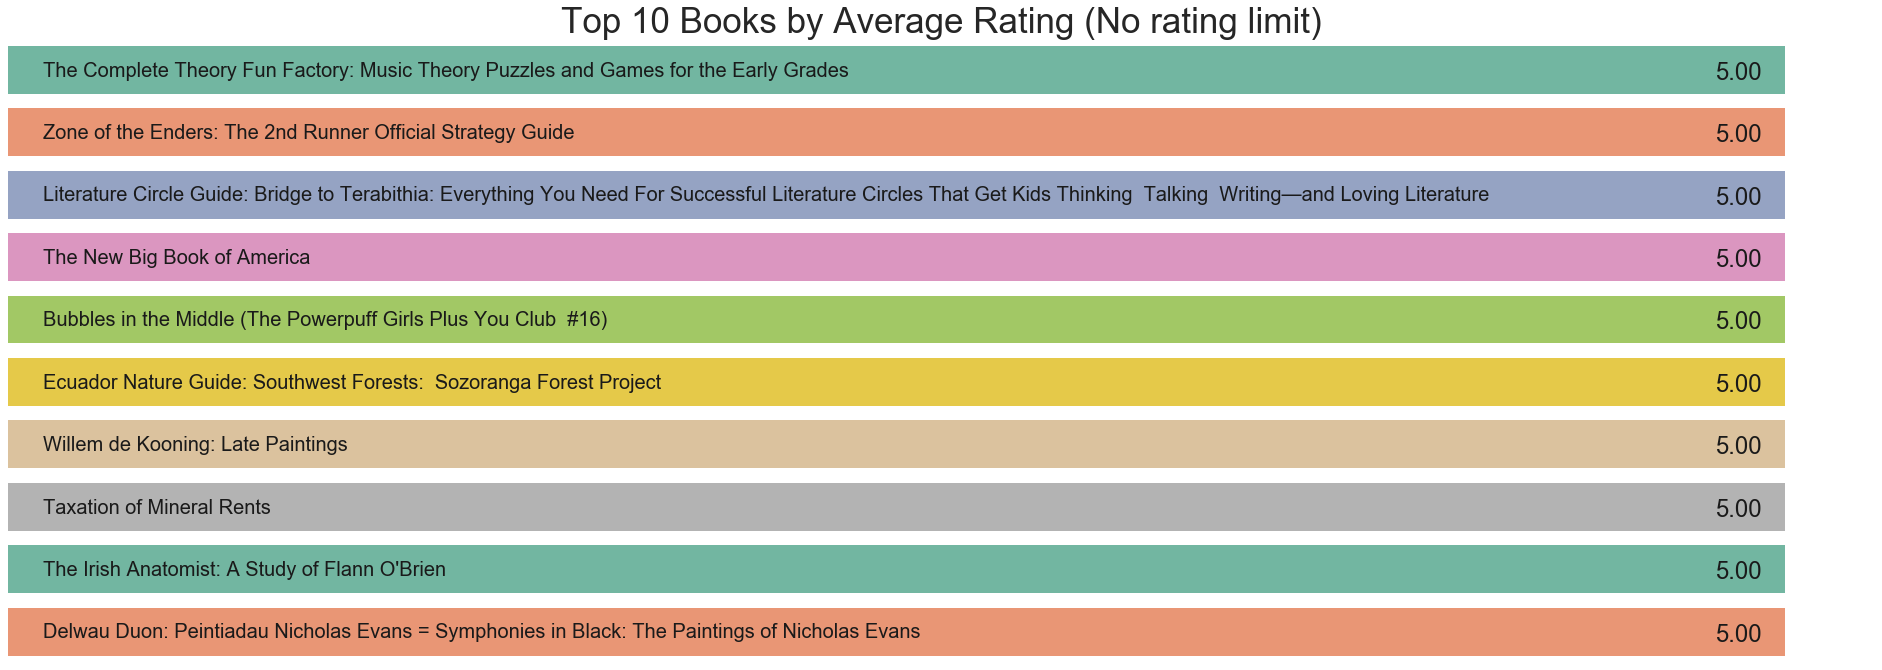

In [109]:
plt.figure(figsize=(27, 10))
ax = sns.barplot(top_10_books_avg_rating['average_rating'], top_10_books_avg_rating.index, palette='Set2')
ax.set_title("Top 10 Books by Average Rating (No rating limit)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.2, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating.index[num]), fontsize = 20, color = 'k')
    num += 1


<a id='#9'></a>
## 4I. What are the top 10 books by average rating? (Num of Ratings > 100)  

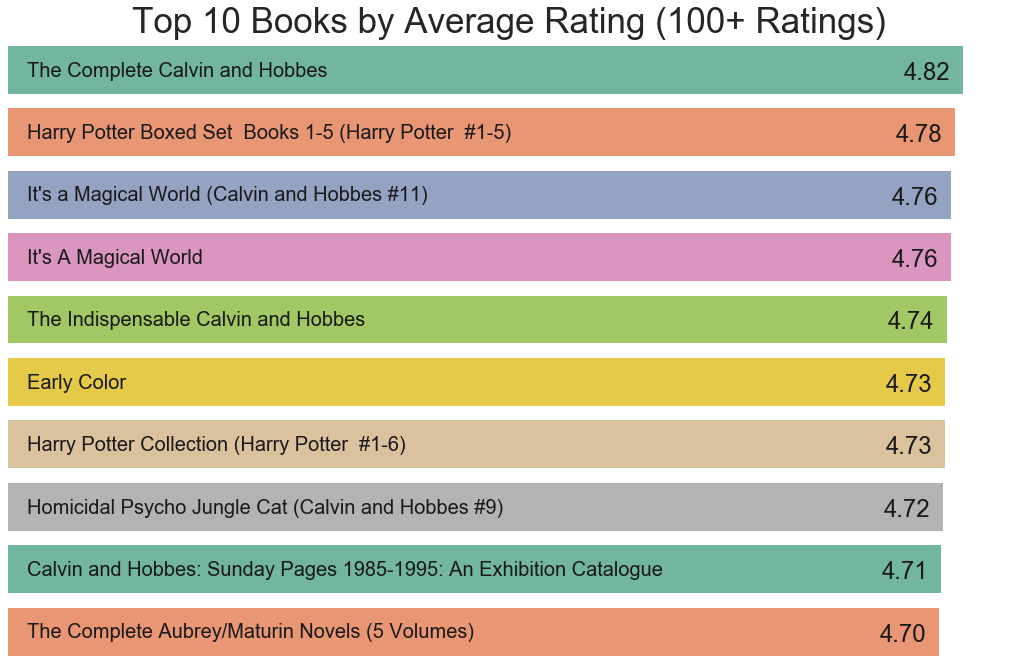

In [110]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(top_10_books_avg_rating_over100['average_rating'], top_10_books_avg_rating_over100.index, palette='Set2')
ax.set_title("Top 10 Books by Average Rating (100+ Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.3, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating_over100.index[num]), fontsize = 20, color = 'k')
    num += 1

<a id='#10'></a>
## 4J. What are the top 10 books by average rating? (Num of Ratings > 1000)

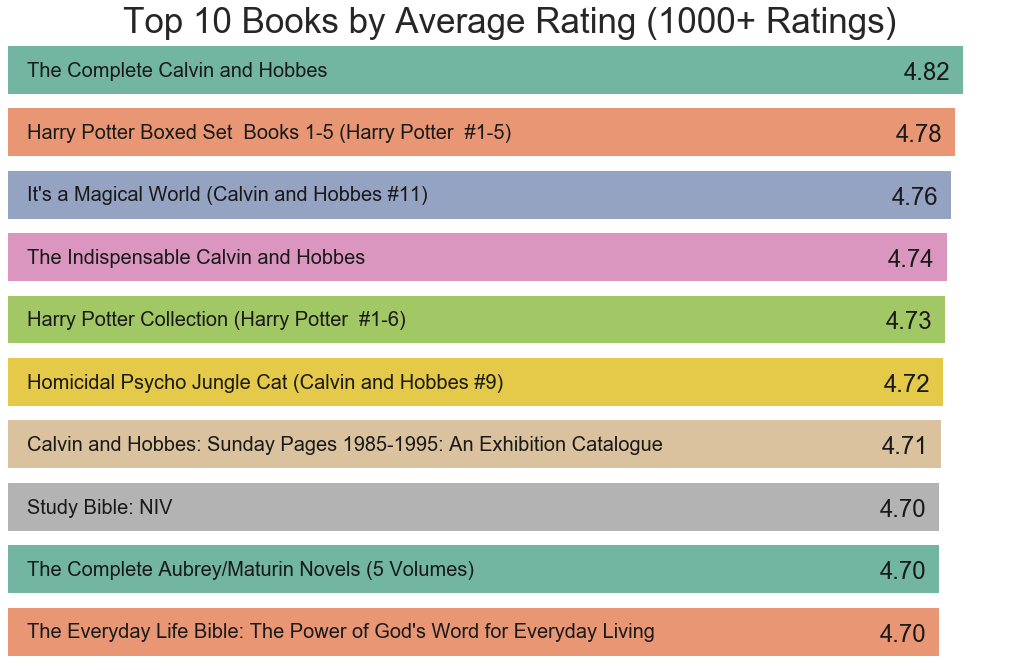

In [111]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(top_10_books_avg_rating_over1000['average_rating'], top_10_books_avg_rating_over1000.index, palette='Set2')
ax.set_title("Top 10 Books by Average Rating (1000+ Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.3, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating_over1000.index[num]), fontsize = 20, color = 'k')
    num += 1

<a id='#11'></a>
## 4K. Which books are top 5 based on their number of ratings?

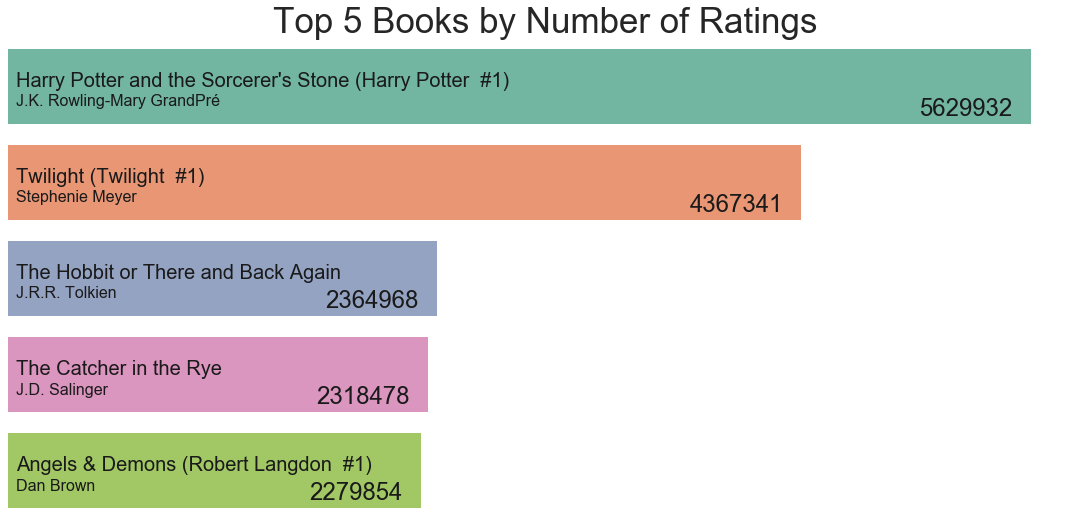

In [112]:
books_by_ratings = df.sort_values('ratings_count', ascending=False).head(5).set_index('title')

plt.figure(figsize=(16, 8))
ax = sns.barplot(books_by_ratings['ratings_count'], books_by_ratings.index, palette='Set2')
ax.set_title("Top 5 Books by Number of Ratings", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-620000, i.get_y()+0.7, "{0:.0f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(50000, i.get_y()+0.4, str(books_by_ratings.index[num]), fontsize = 20, color = 'k')
    ax.text(50000, i.get_y()+0.6, str(books_by_ratings['authors'][num]), fontsize = 16, color = 'k')
    num += 1

**Here I still wanted the number of ratings on the bar as otherwise it changed the aspect ratio of the image. I also wanted to include the authors name, so with some more ax.text and a lot of moving stuff around I ended up with the above.**

<a id='#12'></a>
## 4L. What is the average ratings of all books in the dataset?

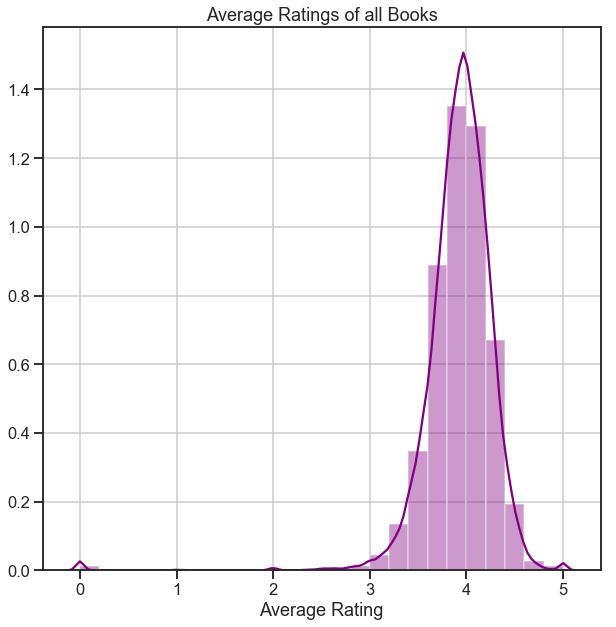

In [113]:
# Average raiting of all books in the dataset.
sns.set_context('talk')
plt.figure(figsize=(10,10))
rating = df.average_rating.astype(float)
ax = sns.distplot(rating, bins=25, color="Purple")
ax.set_xlabel("Average Rating")
ax.set_title("Average Ratings of all Books")
ax.grid()

<a id='#13'></a>
## 4M. What are the top 10 books by average rating? (Num of Ratings > 100)

<Figure size 2160x1440 with 0 Axes>

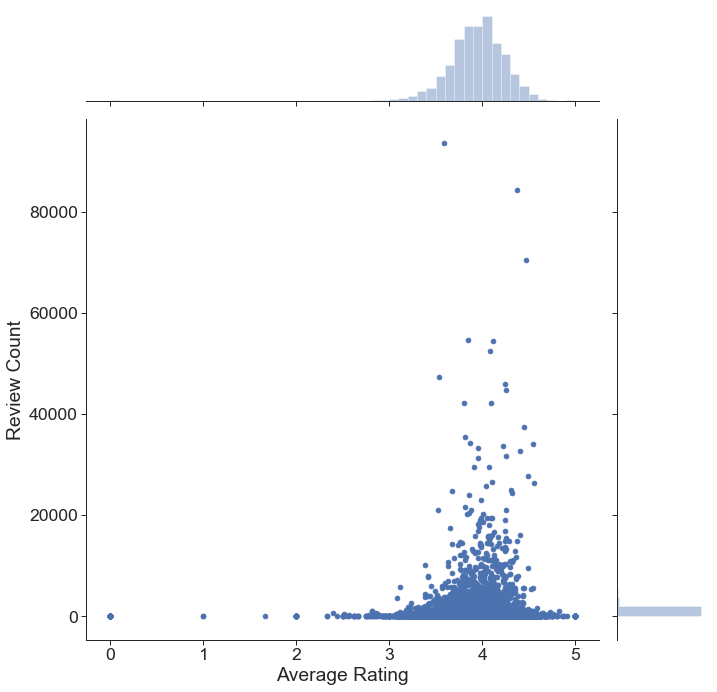

In [114]:
# Average rating of a book based on num of ratings
plt.figure(figsize=(30,20))
df.dropna(0, inplace=True)
sns.set_context('paper', font_scale=2.0)
ax = sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  data=df[['text_reviews_count', 'average_rating']], height=10)
ax.set_axis_labels("Average Rating", "Review Count")
plt.show()

<a id='#14'></a>
## 4N. Is there a relationship between the number of books published and the average rating of all those books per author? 

<Figure size 2160x1440 with 0 Axes>

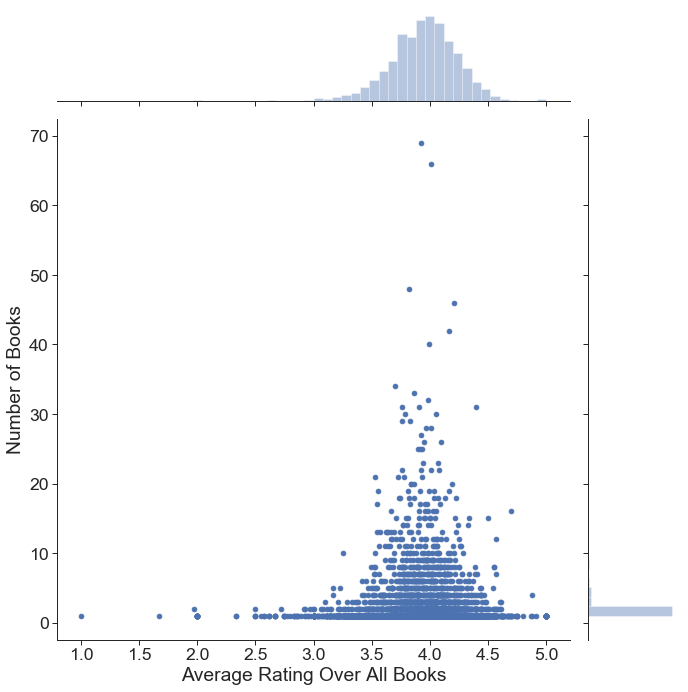

In [115]:
# Each data point is an author based on average rating over all their books.
most_books = df[['authors', 'title', 'average_rating']]
most_books_holder_1 = most_books.groupby('authors')['title'].count().reset_index().reset_index()
most_books_holder_2 = most_books.groupby('authors')['average_rating'].mean().reset_index()
most_books = pd.merge(most_books_holder_1, most_books_holder_2, on='authors', how='inner')
most_books = most_books[most_books.average_rating != 0]

plt.figure(figsize=(30,20))
sns.set_context('paper', font_scale=2.0)
ax = sns.jointplot(x="average_rating",y='title', kind='scatter',  data=most_books[['average_rating', 'title']], height=10)
ax.set_axis_labels("Average Rating Over All Books", "Number of Books")
plt.show()

**With the outliers plotting in these "relationship" graphs, its can be hard sometimes to get a clear idea of the information displayed. Below I decided to force the scales on the x and y axis to show a zoomed in section in the big cluster of data.**

<Figure size 2160x1440 with 0 Axes>

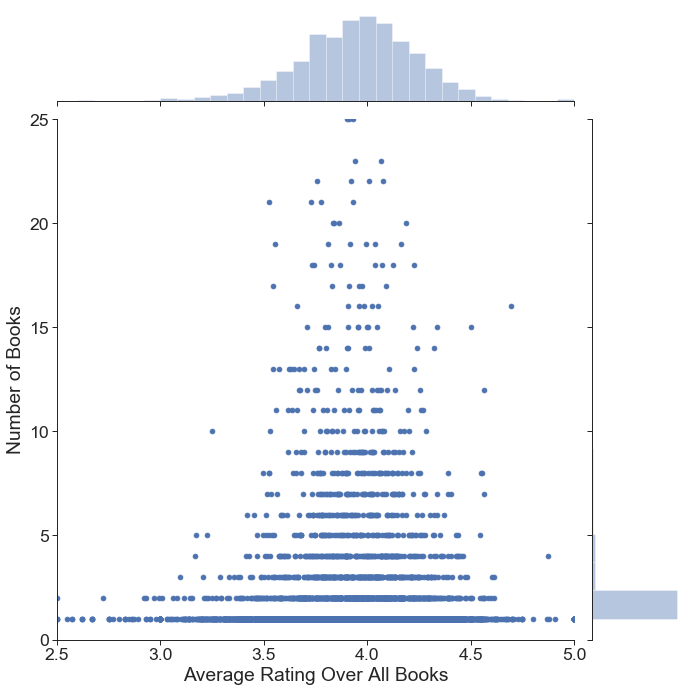

In [116]:
# Zoom in on the dense part of the above graph (MENTION x/y limits!)
plt.figure(figsize=(30,20))
sns.set_context('paper', font_scale=2.0)
ax = sns.jointplot(x="average_rating",y='title', kind='scatter',  data=most_books[['average_rating', 'title']], height=10, xlim=(2.5, 5), ylim=(0, 25))
ax.set_axis_labels("Average Rating Over All Books", "Number of Books")
plt.show()

<a id='#15'></a>
## 4O. What is the relationship between the number of pages of a book and its number of rating? 

<Figure size 1080x720 with 0 Axes>

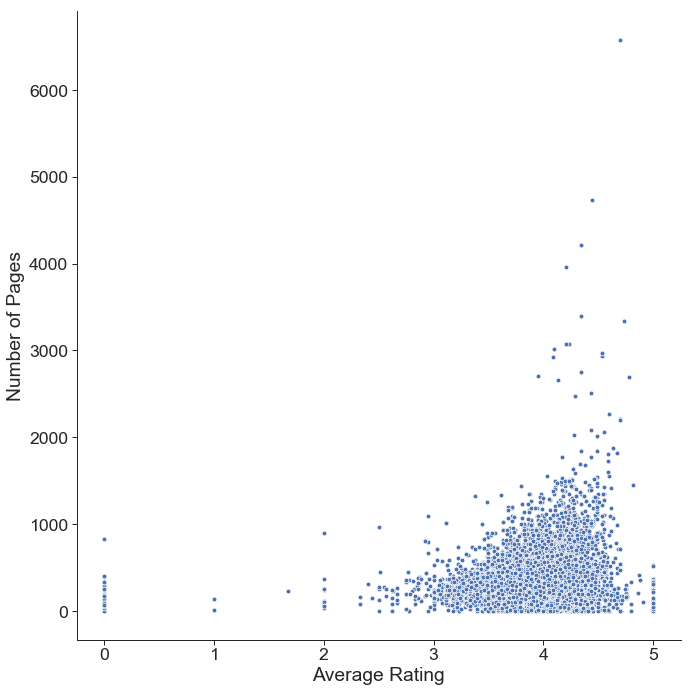

In [117]:
# Relationship between the average rating and number of pages of EACH BOOK.
pages_vs_ratings = df[["average_rating", '# num_pages']]
plt.figure(figsize=(15,10))
sns.set(style="ticks")
sns.set_context('paper', font_scale=2.0)
ax = sns.relplot(x="average_rating", y='# num_pages', data=pages_vs_ratings, height=10)
ax.set_axis_labels("Average Rating", "Number of Pages")

<a id='#takeaways'></a>
# 5. Learning Takeaways

In [123]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" autoplay loop>
      <source src="mingraph.mp4" type="video/mp4">
</video></div>""")

My main goal for this project was to learn and make use of the seaborn and its associate libraries. Through doing that I feel I have also learnt more about better ways to visualize information clearly.
  
I ended up exploring a lot, though through it all I ended up picking a few "standard layouts" for my graphs to keep things similar through the project to keep it feeling cohesive.  
  
Seaborn was very easy to work with, to the point that I feel it will replace vanilla matplotlib for me in the future. The default of the graphs was of much higher standard and it seemed a lot more intuitive to interate on those designs. (As seen with my minimalist graph mp4 above). All these changes were done in around 15 lines of code, almost half of which I ended up putting in its own function to be called multiple times by many graphs.
  
I did end up trying to make some plots with more mathmatical outcomes, like linear regression models, but when tested it seems that this dataset wasn't well suited to these things. In the future though I will be doing another project more based on statsitics with a more suitable dataset.
